# **K-Means Clustering**

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import seaborn as sns

# Setting logging to print only error messages from sklearn
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# Import warnings module
import warnings
warnings.filterwarnings("ignore") # Ignore warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Business Analytics/Teaching materials/MIS 451/Q251/Week 6 - Clustering/Mall_Customers.csv'

In [ ]:
df = pd.read_csv(file_path)

## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.drop(columns=["CustomerID"]).describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


<Axes: xlabel='count', ylabel='Gender'>

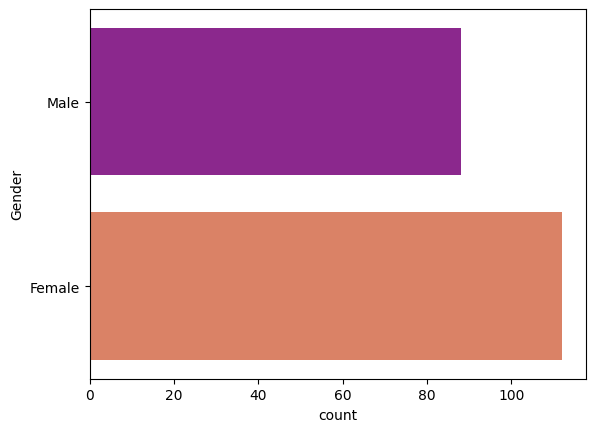

In [ ]:
sns.countplot(df['Gender'], palette='plasma')

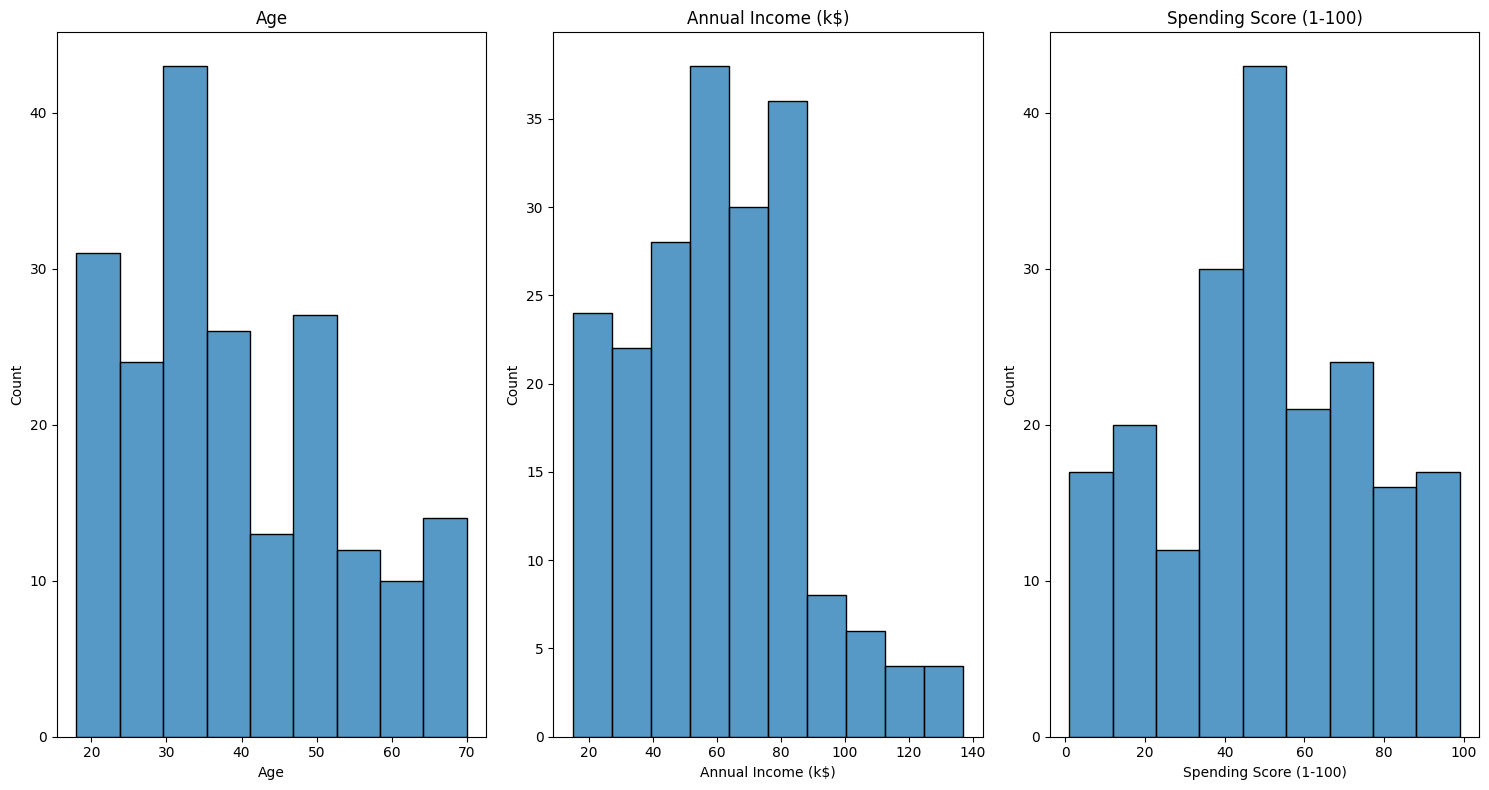

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, colname in enumerate(num_cols):
    sns.histplot(data=df, x=colname, ax=axes[i])
    axes[i].set_title(colname)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

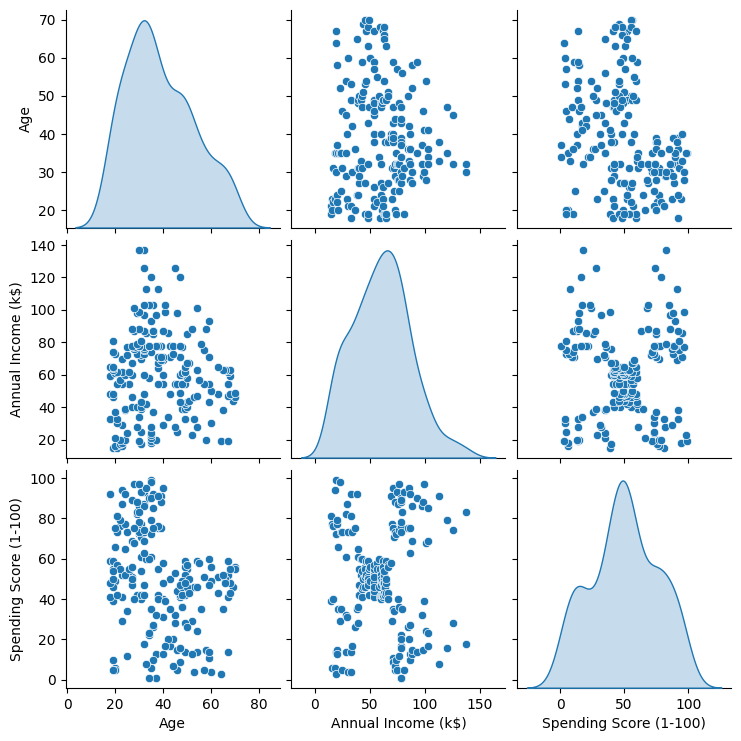

In [ ]:
pair_plot = sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']],
                        diag_kind='kde',
                         palette='plasma')

<Axes: >

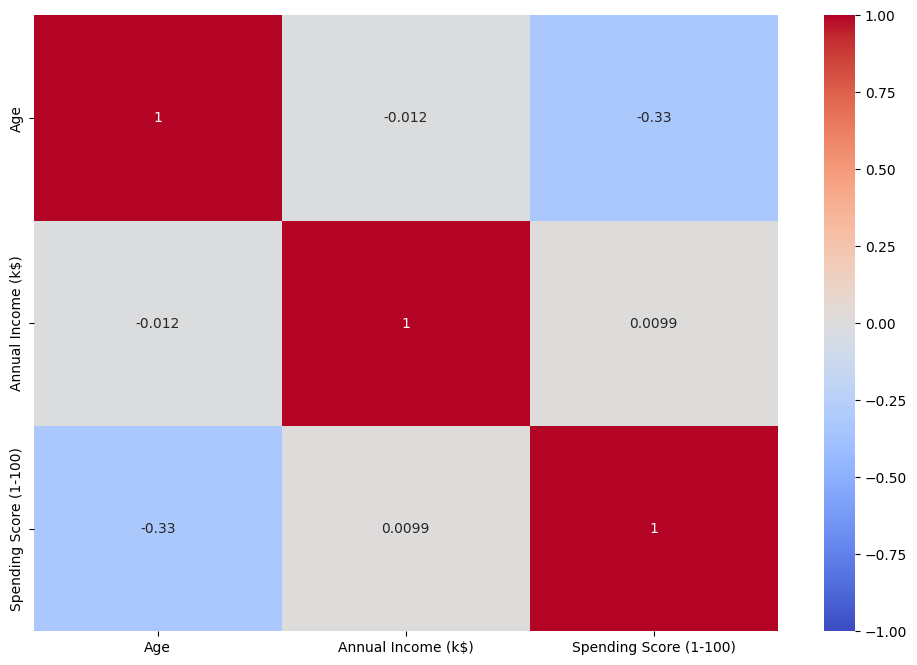

In [ ]:
# Select columns for correlation analysis
cols_cor = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Compute correlation matrix
correlation_matrix = df[cols_cor].corr()

plt.figure(figsize=(12, 8))

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## **Model Development**

In [ ]:
X = df.iloc[:, 3:].values

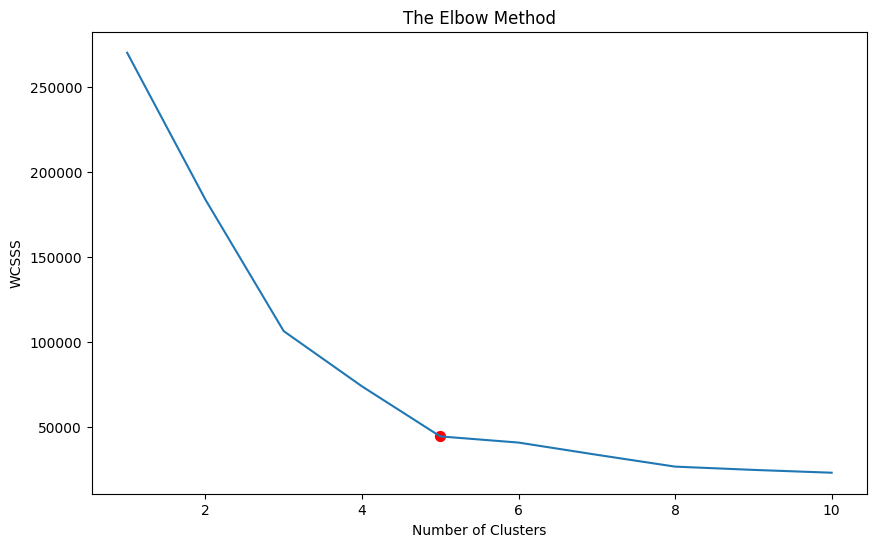

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.scatter(5,wcss[4], s = 200, c = 'red', marker='.')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSSS')
plt.show()

**Model Building**

In [ ]:
labels = KMeans(n_clusters=5, random_state=42).fit_predict(X)

In [ ]:
df_out = df.copy()
df_out["cluster"] = labels + 1
print(df_out["cluster"].value_counts().sort_index())

cluster
1    81
2    39
3    22
4    35
5    23
Name: count, dtype: int64


In [ ]:
df_out.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


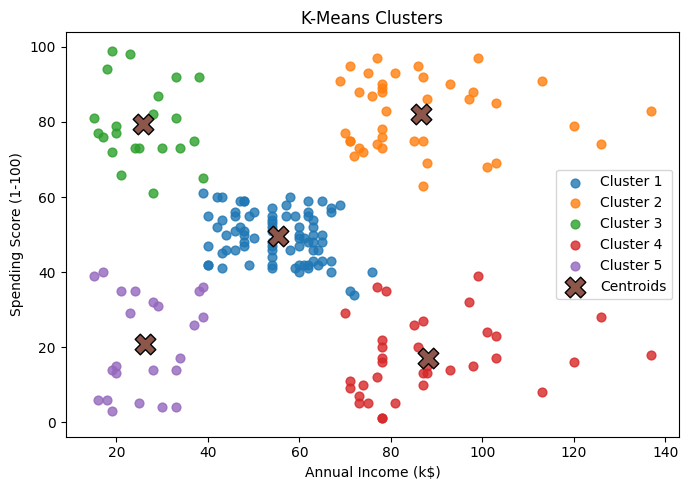

In [ ]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(7,5))
for i in range(kmeans.n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                s=40, alpha=0.8, label=f'Cluster {i+1}')

# plot centroids
plt.scatter(centers[:, 0], centers[:, 1],
            s=220, marker='X', edgecolor='k', linewidths=1, label='Centroids')

plt.title('K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.tight_layout()
plt.show()


## **Model Evaluation**

In [ ]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(X, labels)
print(round(sil, 3))

0.554


# **Citing this Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main